In [32]:
import sys
print(sys.version)

3.10.12 (main, Nov 20 2023, 15:14:05) [GCC 11.4.0]


In [33]:
import tensorflow as tf
from tensorflow import keras
from keras import layers, models, regularizers
from keras.layers import Flatten, add, Dense, Dropout
from keras.callbacks import ModelCheckpoint, EarlyStopping


print("TensorFlow version:", tf.__version__)
tf.keras.backend.set_floatx('float64')

TensorFlow version: 2.15.0


In [34]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from PIL import Image
import os
import csv
import random

import cv2
import imutils
import glob
# Make NumPy printouts easier to read.
np.set_printoptions(precision=3, suppress=True)

In [35]:
#Dodanie dysku google do colab
from google.colab import drive
drive.mount("/content/drive", force_remount=True)

Mounted at /content/drive


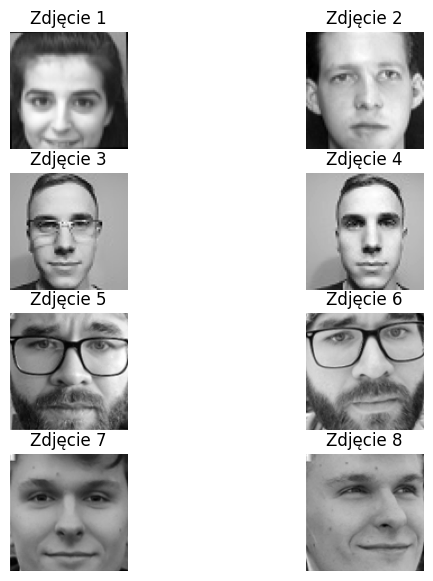

In [99]:
# Ścieżki do wczytanych zdjęć
image_paths = ['/test/p_1.png', '/test/p_2.png', '/Adam/adam_1.jpg', '/Adam/adam_2.jpg', '/Mateusz/Mateusz_1.png', '/Mateusz/Mateusz_2.png', '/Adrian/Adrian_1.png', '/Adrian/Adrian_2.png']

# Inicjalizacja macierzy 4x2 do przechowywania zdjęć
rows, cols = 4, 2
fig, axs = plt.subplots(rows, cols, figsize=(7, 7))

# Iteracja po zdjęciach i ich wyświetlanie
for i in range(rows):
    for j in range(cols):
        # Wczytanie i wyświetlenie zdjęcia
        img = Image.open('/content/drive/MyDrive/Multimedia'+image_paths[i * cols + j]).convert('L')
        axs[i, j].imshow(img, cmap = 'gray')
        axs[i, j].axis('off')  # Wyłączenie osi
        axs[i, j].set_title(f'Zdjęcie {i * cols + j + 1}')

# Wyświetlenie macierzy zdjęć
plt.show()

In [100]:
# Wczytywane dane muszą być kwadratowe np. 512x512
# Na zjęciu powinna znajdować się tylko sama twarz

path = '/content/drive/MyDrive/Multimedia/'

im_1 = Image.open(path + 'test/p_1.png')
im_2 = Image.open(path + 'test/p_2.png')

adam_1 = Image.open(path + 'Adam/adam_1.jpg').convert('L')
adam_2 = Image.open(path + 'Adam/adam_2.jpg').convert('L')

mateusz_1 = Image.open(path + '/Mateusz/Mateusz_1.png').convert('L')
mateusz_2 = Image.open(path + '/Mateusz/Mateusz_2.png').convert('L')

adrian_1 = Image.open(path + '/Adrian/Adrian_1.png').convert('L')
adrian_2 = Image.open(path + '/Adrian/Adrian_2.png').convert('L')



# Zmiana formatu z AxA na 64x64
#con_2 = con.resize((int(64), int(64)))

mateusz_1 = mateusz_1.resize((int(64), int(64)))
mateusz_2 = mateusz_2.resize((int(64), int(64)))

adrian_1 = adrian_1.resize((int(64), int(64)))
adrian_2 = adrian_2.resize((int(64), int(64)))

In [38]:
model = models.Sequential()
model.compile(optimizer='adam',
              loss='mse',
              metrics=['accuracy','mse'])

In [39]:
model = tf.keras.models.load_model('/content/drive/MyDrive/Multimedia/Model_przeplatane_wiersze.h5', compile=False)

In [40]:
def gen_image(im_1, im_2):

  w, h = 64, 128
  data = np.zeros((h, w), dtype=np.uint8)

  arr_im_1 = np.array(im_1)
  arr_im_2 = np.array(im_2)

  a = 0

  for x in range(len(arr_im_1[0])):
    x = 2*x
    data[x] = arr_im_1[a]
    data[x+1] = arr_im_2[a]
    a = a + 1

  data = data / 255.0

  return data

In [83]:
def print_images(im_1, im_2):
  # Inicjalizacja macierzy 2x3 do przechowywania zdjęć
  rows, cols = 1, 2
  fig, axs = plt.subplots(rows, cols, figsize=(5, 5))


  # Wyświetlenie zdjęcia

  axs[0].imshow(im_1, cmap = 'gray')
  axs[0].axis('off')  # Wyłączenie osi
  axs[0].set_title(f'Zdjęcie 1')

  axs[1].imshow(im_2, cmap = 'gray')
  axs[1].axis('off')  # Wyłączenie osi
  axs[1].set_title(f'Zdjęcie 2')

  # Wyświetlenie macierzy zdjęć
  plt.show()

In [86]:
#Zwraca 1 jezeli osoby s podobne, 0 jak sa rozne
def face_recognaction(im_1, im_2, print):

  con = gen_image(im_1, im_2)


  if print:
    print_images(im_1, im_2)

  images_test = []

  images_test.append(con)
  x_test = np.array(images_test)

  predict_x = model.predict(x_test)
  prediction = (predict_x > 0.5).astype("int32")

  pred = [prediction[0][0], predict_x[0][0]]

  return pred




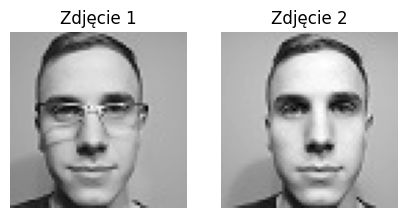

1/1 [==============================] - 0s 28ms/step
Ta sama osoba
1
0.6537347199451946


In [90]:
#Sprawdznie podobienstwa

pred = face_recognaction(adam_1, adam_2, True)

if pred[0] == 1:
  print('Ta sama osoba')
else:
  print('Rozne osoby')

print(pred[0])
print(pred[1])

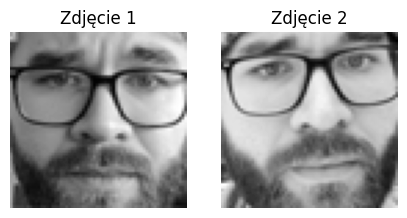

1/1 [==============================] - 0s 29ms/step
Rozne osoby
0
0.0


In [96]:
#Sprawdznie podobienstwa

pred = face_recognaction(mateusz_1, mateusz_2, True)

if pred[0] == 1:
  print('Ta sama osoba')
else:
  print('Rozne osoby')

print(pred[0])
print(pred[1])

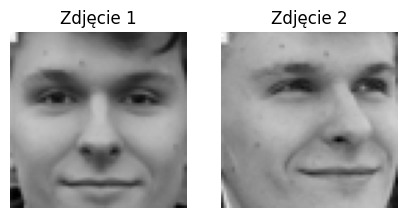

1/1 [==============================] - 0s 48ms/step
Ta sama osoba
1
1.2368312250347637


In [101]:
#Sprawdznie podobienstwa

pred = face_recognaction(adrian_1, adrian_2, True)

if pred[0] == 1:
  print('Ta sama osoba')
else:
  print('Rozne osoby')

print(pred[0])
print(pred[1])

In [ ]:
# Tak wiem, wartosci powinny byc od 0 do 1 ale zle ustawilem ostatnia wartste podczas uczenia xd